In [7]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
autoreload 2

In [9]:
%matplotlib inline

In [10]:
from sympy import init_printing

In [12]:
import matplotlib.pyplot as plt
from scipy import stats, optimize
from scipy.special import erf
import numpy as np
import sympy as sym

import inputs
import models
import shooting

from __future__ import division

### Welcome to the Estimation notebook!

This notebook defines some workers and firms - usign parameters obtained from Distributions.ipynb - solves for a first run of the model and then uses the estimation code to get the sum of squared residuals between data (taken from PD05_wage.csv) and the implied functions of the model: mu(x), theta(x), w(x)

In [106]:
# define some default workers skill
x, mu1, sigma1 = sym.var('x, mu1, sigma1')
skill_cdf = 1e2 * (0.5 + 0.5 * sym.erf((x - mu1) / sym.sqrt(2 * sigma1**2)))
skill_params = {'mu1': 0, 'sigma1': 1.0}
skill_bounds = [1e-2, 5.0]

workers = inputs.Input(var=x,
                       cdf=skill_cdf,
                       params=skill_params,
                       bounds=skill_bounds,
                       )

# define some default firms
y, mu2, sigma2 = sym.var('y, mu2, sigma2')
productivity_cdf = (0.5 + 0.5 * sym.erf((y - mu2) / sym.sqrt(2 * sigma2**2)))
productivity_params = {'mu2': 0.0, 'sigma2': 1.0}
productivity_bounds = [1e-2, 5.0]

firms = inputs.Input(var=y,
                     cdf=productivity_cdf,
                     params=productivity_params,
                     bounds=productivity_bounds,
                     )

# define symbolic expression for CES between x and y
omega_A, sigma_A, Big_A = sym.var('omega_A, sigma_A, Big_A')
A = ((omega_A * x**((sigma_A - 1) / sigma_A) + 
     (1 - omega_A) * y**((sigma_A - 1) / sigma_A))**(sigma_A / (sigma_A - 1))) 

# define symbolic expression for Cobb-Douglas between l and r
l, r, omega_B, sigma_B = sym.var('l, r, omega_B, sigma_B')
B = l**omega_B * r**(1 - omega_B)

F = Big_A * (A * B)

F_params = {'omega_A':0.6, 'omega_B':0.8, 'sigma_A':0.9, 'Big_A':1e2}

model = models.Model('positive',
                     workers=workers,
                     firms=firms,
                     production=F,
                     params=F_params)

solver = shooting.ShootingSolver(model=model)

In [107]:
solver.solve(1e3, tol=1e-6, number_knots=1000, integrator='vode', atol=1e-15, rtol=1e-12, message=True)

Exhausted firms: initial guess of 500.0 for firm size is too low.
Exhausted workers: initial guess of 750.0 for firm size is too high!
Exhausted workers: initial guess of 625.0 for firm size is too high!
Exhausted firms: initial guess of 562.5 for firm size is too low.
Exhausted workers: initial guess of 593.75 for firm size is too high!
Exhausted workers: initial guess of 578.125 for firm size is too high!
Exhausted workers: initial guess of 570.3125 for firm size is too high!
Exhausted workers: initial guess of 566.40625 for firm size is too high!
Exhausted firms: initial guess of 564.453125 for firm size is too low.
Exhausted firms: initial guess of 565.4296875 for firm size is too low.
Exhausted firms: initial guess of 565.91796875 for firm size is too low.
Exhausted firms: initial guess of 566.162109375 for firm size is too low.
Exhausted workers: initial guess of 566.284179688 for firm size is too high!
Exhausted firms: initial guess of 566.223144531 for firm size is too low.
Exh

** Now that everything is defined, let's try to solve the model once first! **

This will give us a good idea about inital guesses and number of knots.

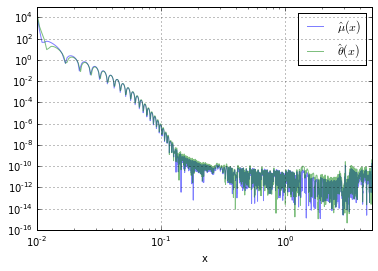

In [110]:
# Plotting the residuals
solver.residuals.plot(loglog=True, alpha=0.5)
plt.show()

In [111]:
solver.solution

,$\mu(x)$,$\theta(x)$,$w(x)$,$\pi(x)$
x,,,,
0.010000,0.010000,0.564803,0.896831,0.126633
0.014995,0.072255,16.892944,1.237449,5.226039
0.019990,0.097316,22.878978,1.558277,8.912944
0.024985,0.117482,26.831102,1.863185,12.497830
0.029980,0.135218,29.870430,2.155634,16.097426
0.034975,0.151411,32.395289,2.437945,19.744484
0.039970,0.166499,34.589932,2.711760,23.449899
0.044965,0.180739,36.553795,2.978290,27.216948
0.049960,0.194296,38.346442,3.238461,31.045866


In [113]:
thetas_hat = solver.solution['$\\theta(x)$'].values
ys_hat = solver.solution['$\\mu(x)$'].values
def cdf_firms(y):
    return (0.5 + 0.5 * erf((y - 0.0) / np.sqrt(2 * 1.0**2)))
def pdf_firms(y):
    return 0.5*np.sqrt(2)*np.exp(-(-0.0 + y)**2/(2*1.0**2))/(np.sqrt(np.pi)*np.sqrt(1.0**2))
cdf_y = cdf_firms(ys_hat)
pdf_y = pdf_firms(ys_hat)

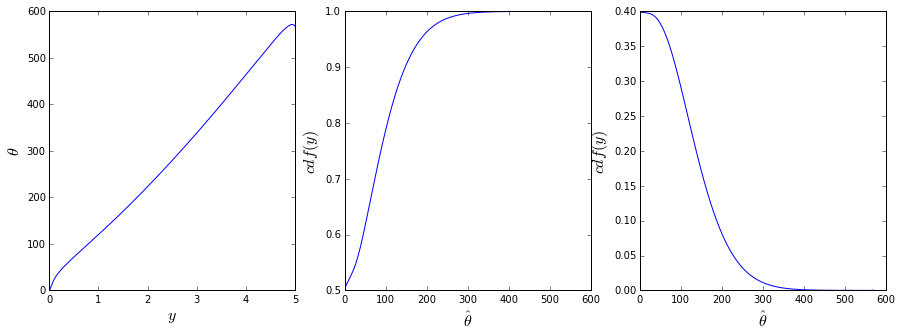

In [114]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(ys_hat, thetas_hat)
plt.xlabel("$y$", fontsize=16)
plt.ylabel("$\\theta$", fontsize=16)

plt.subplot(132)
plt.plot(thetas_hat, cdf_y)
plt.xlabel("$\hat{\\theta}$", fontsize=16)
plt.ylabel("$cdf(y)$", fontsize=16)

plt.subplot(133)
plt.plot(thetas_hat, pdf_y)
plt.xlabel("$\hat{\\theta}$", fontsize=16)
plt.ylabel("$cdf(y)$", fontsize=16)

plt.show()

In [96]:
sum(pdf_y)

68.453805466146591

array([  3.98922334e-01,   3.98499850e-01,   3.98093806e-01,
         3.97656421e-01,   3.97185911e-01,   3.96683663e-01,
         3.96151543e-01,   3.95591367e-01,   3.95004790e-01,
         3.94393295e-01,   3.93758201e-01,   3.93100692e-01,
         3.92421828e-01,   3.91722569e-01,   3.91003788e-01,
         3.90266281e-01,   3.89510777e-01,   3.88737951e-01,
         3.87948428e-01,   3.87142785e-01,   3.86321566e-01,
         3.85485276e-01,   3.84634392e-01,   3.83769362e-01,
         3.82890609e-01,   3.81998534e-01,   3.81093518e-01,
         3.80175922e-01,   3.79246093e-01,   3.78304359e-01,
         3.77351037e-01,   3.76386427e-01,   3.75410822e-01,
         3.74424499e-01,   3.73427728e-01,   3.72420768e-01,
         3.71403869e-01,   3.70377273e-01,   3.69341215e-01,
         3.68295920e-01,   3.67241610e-01,   3.66178498e-01,
         3.65106791e-01,   3.64026692e-01,   3.62938397e-01,
         3.61842098e-01,   3.60737982e-01,   3.59626230e-01,
         3.58507022e-01,

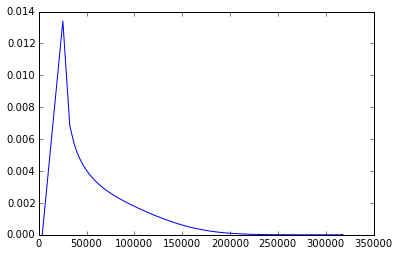

In [168]:
chop_chop = np.array(0.0,)
for i in range(1,1000):
    chop_chop = np.hstack((chop_chop,cdf_y[i]-cdf_y[i-1]))
plt.plot(thetas_hat, chop_chop)
plt.show()

** Time to import the estimation_code **

In [55]:
import new_estimation_file as est

Now we can try if the objective function works:

In [16]:
# Starting arbitrary parameters
ps = (0.9, 0.93, 0.3)

# Reading data from csv file
xs, ys, thetas, ws = est.import_data('data05_normed2.csv', ID=False)

# Worker skill parameters are taken from Histograms.ipynb - and correspond to log wages mean and variance
skill_p = (1.0000000000000002, 0.16382221849787501)
skill_b = [1e-2, 1.4991086434]

#skill_p = (3.8894753094349528, 0.63718247398434291)
#skill_b = [0.01, 340.6127]

# Firm skill parameters are also taken from Histograms.ipynb - and correspond to log profit mean and variance (firm level)
firm_p = (1.0000000000000002, 0.26979838777863219)
firm_b = [0.0921194652671, 1.95530939088]

#firm_p = (7.13768801209, 1.92573671813)
#firm_b = [1.93, 1151284.0]

# Run!
est.ObjectiveFunction(ps, (xs, ys, thetas, ws), skill_p, skill_b, firm_p, firm_b, 2.3)

Success! All workers and firms are matched


48.865643540107897

Or try the two functions individually:

In [17]:
# SolveModel
functions, new_guess = est.Solve_Model(F, F_params, workers, firms, 'positive', 6000.0, 'lsoda', 2.3)
mu_hat, theta_hat, w_hat = functions

Success! All workers and firms are matched


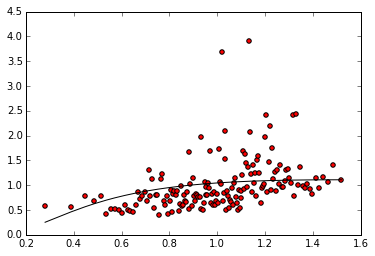

In [18]:
# Plotting the function vs the data (some fit better than others)
mus1 = []
ys_copy = np.sort(ys)
for i in range(len(ys_copy)):
    mus1.append(theta_hat(ys_copy[i]))
plt.plot(ys_copy, mus1, c='black')
plt.scatter(ys, thetas, c='r')
#plt.xlim(0,10)
#plt.ylim(0,500)
plt.show()

In [ ]:
# Checking the mean square error - actually, the sum of squared errors of mu(x), theta(x), w(x)
est.Calculate_MSE( (xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat) )

## Estimation

In [73]:
# Starting, arbitrary parameters
ps = (0.9, 0.9, 0.3)

# Reading data from csv file
xs, ys, thetas, ws = est.import_data('data05_normed2.csv', ID=False)

# Worker skill parameters are taken from Histograms.ipynb - and correspond to log wages mean and variance
skill_p = (1.0000000000000002, 0.16382221849787501)
skill_b = [1e-2, 1.4991086434]

#skill_p = (3.8894753094349528, 0.63718247398434291)
#skill_b = [0.01, 340.6127]

# Firm skill parameters are also taken from Histograms.ipynb - and correspond to log profit mean and variance (firm level)
firm_p = (1.0000000000000002, 0.26979838777863219)
firm_b = [0.0921194652671, 1.95530939088]

#firm_p = (7.13768801209, 1.92573671813)
#firm_b = [1.93, 1151284.0]

In [62]:
import estimation_code_norm as est

In [74]:
# Starting, arbitrary parameters
ps = (0.6,  0.75,  0.37837383, 1e2)

# Reading data from csv file
pis, thetas, ws = est.import_data2('SPA05.csv', ID=False)

# Worker skill parameters are taken from Histograms.ipynb - and correspond to log wages mean and variance
skill_p = (0.0, 1.0)
skill_b = [1e-2, 5.0]

#skill_p = (3.8894753094349528, 0.63718247398434291)
#skill_b = [0.01, 340.6127]

# Firm skill parameters are also taken from Histograms.ipynb - and correspond to log profit mean and variance (firm level)
firm_p = (0.0, 1.0)
firm_b = [1e-2, 5.0]

#firm_p = (7.13768801209, 1.92573671813)
#firm_b = [1.93, 1151284.0]

In [69]:
res = optimize.minimize(est.StubbornObjectiveFunction2, (0.9, 0.60, 0.30,90.53818477), args=((pis, thetas, ws), skill_p, skill_b, firm_p, firm_b, 6.0), method='L-BFGS-B', jac=None, hess=None, hessp=None, bounds=((1e-3,1.0-1e-3),(1e-3,1.0-1e-3),(1e-3,None),(1e-3,None)), constraints=(), tol=None, callback=None, options=None)

Success! All workers and firms are matched
84.908234379 [  0.59113953   0.55909586   0.27660712  90.53818477]
Success! All workers and firms are matched
84.9080999818 [  0.59113954   0.55909586   0.27660712  90.53818477]
Success! All workers and firms are matched
84.9077395156 [  0.59113953   0.55909587   0.27660712  90.53818477]
Success! All workers and firms are matched
84.9077487211 [  0.59113953   0.55909586   0.27660713  90.53818477]
Success! All workers and firms are matched
84.9082336416 [  0.59113953   0.55909586   0.27660712  90.53818478]
Wooops!  [  0.59114793   0.55910492   1.27660597  90.53970311] Approximated solution failed to satisfy required assortativity condition.


AssertionError: Firm size should be non-negative!

In [68]:
res

  status: 2
 success: False
    nfev: 1425
     fun: 84.906906000382605
       x: array([  0.59113953,   0.55909586,   0.27660712,  90.53818476])
 message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     jac: array([  1.23975579e+05,   8.81216357e+04,   8.91410494e+04,
        -5.17139668e+01])
     nit: 23

In [161]:
res = optimize.minimize(est.BulletProofObjectiveFunction, (0.55, 0.9, 0.3), args=((xs, ys, thetas, ws), skill_p, skill_b, firm_p, firm_b, 100.0), method='L-BFGS-B', jac=None, hess=None, hessp=None, bounds=((1e-3,1.0-1e-3),(1e-3,1.0-1e-3),(1e-3,None)), constraints=(), tol=None, callback=None, options=None)

Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched


In [162]:
res

  status: 0
 success: True
    nfev: 15
     fun: 649.63568352502125
       x: array([ 0.55,  0.9 ,  0.3 ])
 message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     jac: array([ -3656.270178  ,  12637.01185508,   1855.53847132])
     nit: 1

### Appendix

In [ ]:
# Pottentially useful bit of code
rxs = solver.solution.index.values
rmus = solver.solution['$\\mu(x)$'].values
rthetas = solver.solution['$\\theta(x)$'].values
rws = solver.solution['$w(x)$'].values

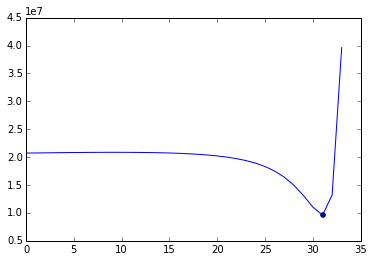

Best result: 9608553.88584 ; Omega: 0.4


In [115]:
plt.plot(results_i[:-5])
plt.xlim(0,35)
plt.scatter(results_i.index(min(results_i)), min(results_i))
plt.show()
print "Best result:",min(results_i),"; Omega:",0.4